In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def uniform_noise(oldimg, a, b):
    H, W = oldimg.shape[:2]
    L = oldimg.shape[2] if len(oldimg.shape) == 3 else 1
    number_of_pixel = round((1 / (b - a)) * H * W) if b != a else 0
    newimg = oldimg.copy()

    if L == 3:
        for i in range(255):
            for j in range(number_of_pixel):
                row = np.random.randint(H)
                column = np.random.randint(W)
                for y in range(3):
                    newimg[row, column, y] = oldimg[row, column, y] + 10

        for i in range(3):
            mn = np.min(np.min(newimg[:, :, i]))
            mx = np.max(np.max(newimg[:, :, i]))
            newimg[:, :, i] = ((newimg[:, :, i] - mn) / (mx - mn)) * 255
    else:
        for i in range(255):
            for j in range(number_of_pixel):
                row = np.random.randint(H)
                column = np.random.randint(W)
                newimg[row, column] = oldimg[row, column] + i

    return newimg

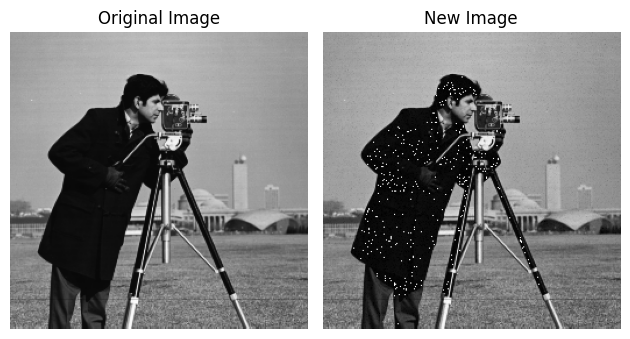

In [3]:
# Read the image
image = cv2.imread('cameraman.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Specify the parameter
a= 5
b=8

# Apply uniform function
newImage = uniform_noise(gray_image, a, b)

# Display the original image and new image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(newImage, cmap='gray')
plt.title('New Image')
plt.axis('off')

plt.tight_layout()
plt.show()